Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [x] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [x] Begin with baselines for classification.
- [x] Use scikit-learn for logistic regression.
- [x] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [x] Get your model's test accuracy. (One time, at the end.)
- [x] Commit your notebook to your fork of the GitHub repo.
- [x] Watch Aaron's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [x] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [x] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [3]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [5]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [6]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [7]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

### Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.

In [8]:
df.head().T

,0,1,2,3,4
Burrito,California,California,Carnitas,Asada,California
Date,1/18/2016,1/24/2016,1/24/2016,1/24/2016,1/27/2016
Yelp,3.5,3.5,NaN,NaN,4
Google,4.2,3.3,NaN,NaN,3.8
Chips,NaN,NaN,NaN,NaN,x
Cost,6.49,5.45,4.85,5.25,6.59
Hunger,3,3.5,1.5,2,4
Mass (g),NaN,NaN,NaN,NaN,NaN
Density (g/mL),NaN,NaN,NaN,NaN,NaN
Length,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isna().sum()

Burrito             0
Date                0
Yelp              334
Google            334
Chips             395
Cost                7
Hunger              3
Mass (g)          399
Density (g/mL)    399
Length            138
Circum            140
Volume            140
Tortilla            0
Temp               20
Meat               14
Fillings            3
Meat:filling        9
Uniformity          2
Salsa              25
Synergy             2
Wrap                3
Unreliable        388
NonSD             414
Beef              242
Pico              263
Guac              267
Cheese            262
Fries             294
Sour cream        329
Pork              370
Chicken           400
Shrimp            400
Fish              415
Rice              385
Beans             386
Lettuce           410
Tomato            414
Bell peper        414
Carrots           420
Cabbage           413
Sauce             383
Salsa.1           414
Cilantro          406
Onion             404
Taquito           417
Pineapple 

In [10]:
df2 = df
print(df2.shape)
df2.dropna(axis=1, thresh=100, inplace=True)
print(df2.shape)

df2['Date'] = pd.to_datetime(df2['Date'], 
            infer_datetime_format=True)

train = df2[df2.Date.dt.year < 2017]
val = df2[df2.Date.dt.year == 2017]
test = df2[df2.Date.dt.year > 2017]

print(train.shape[0]+val.shape[0]+test.shape[0]==df2.shape[0])

(421, 59)
(421, 22)
True


In [11]:
df2.isna().sum() 
# Why are there still columns with NaN values
# that are > 100?          

Burrito           0
Date              0
Cost              7
Hunger            3
Length          138
Circum          140
Volume          140
Tortilla          0
Temp             20
Meat             14
Fillings          3
Meat:filling      9
Uniformity        2
Salsa            25
Synergy           2
Wrap              3
Beef            242
Pico            263
Guac            267
Cheese          262
Fries           294
Great             0
dtype: int64

In [12]:
df2.dropna().shape, df2.shape

# Performing dropna() isn't an option at this point
# since we would be losing ~95% of our data

((25, 22), (421, 22))

### Begin with baselines for classification.

In [13]:
target = 'Great'
y_train = train[target]
y_train.value_counts(normalize=True)

False    0.590604
True     0.409396
Name: Great, dtype: float64

In [14]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.5906040268456376

In [15]:
y_val = val[target]
y_pred = [majority_class] * len(y_val)
accuracy_score(y_val, y_pred)

0.5529411764705883

### Use scikit-learn for logistic regression.

In [52]:
features = train.columns.values.tolist()
features

['Burrito',
 'Date',
 'Cost',
 'Hunger',
 'Length',
 'Circum',
 'Volume',
 'Tortilla',
 'Temp',
 'Meat',
 'Fillings',
 'Meat:filling',
 'Uniformity',
 'Salsa',
 'Synergy',
 'Wrap',
 'Beef',
 'Pico',
 'Guac',
 'Cheese',
 'Fries',
 'Great']

In [53]:
target = 'Great'

# These features are being removed because pandas did not
# successfully drop them in spit of having >100 NaN values
remove_features = [target, 'Date', 'Length', 'Circum', 'Volume',
                  'Beef', 'Pico', 'Guac', 'Cheese', 'Fries'] 

# features.remove doesn't take in lists in the parameter
features.remove(target)
features.remove('Date')
features.remove('Length')
features.remove('Circum')
features.remove('Volume')
features.remove('Beef')
features.remove('Pico')
features.remove('Guac')
features.remove('Cheese')
features.remove('Fries')

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [18]:
X_train.dtypes

Burrito          object
Cost            float64
Hunger          float64
Tortilla        float64
Temp            float64
Meat            float64
Fillings        float64
Meat:filling    float64
Uniformity      float64
Salsa           float64
Synergy         float64
Wrap            float64
dtype: object

In [20]:
X_train.isna().sum()

Burrito          0
Cost             6
Hunger           1
Tortilla         0
Temp            15
Meat            10
Fillings         1
Meat:filling     6
Uniformity       2
Salsa           20
Synergy          2
Wrap             2
dtype: int64

In [22]:
X_train['Burrito'].value_counts()

California     118
Other          110
Asada           35
Surf & Turf     21
Carnitas        14
Name: Burrito, dtype: int64

In [57]:
# Encode 'Burrito' using catboost (Stretch Goal)

import category_encoders as ce
from category_encoders.cat_boost import CatBoostEncoder

cb_encoder = ce.CatBoostEncoder(cols=['Burrito'])
cb_train_encoded = cb_encoder.fit_transform(X_train, y_train)
cb_val_encoded = cb_encoder.fit_transform(X_val, y_val)
cb_test_encoded = cb_encoder.transform(X_test, y_test)
cb_train_encoded.head().T

from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(cb_train_encoded)
X_val_imputed = imputer.transform(cb_val_encoded)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_imputed, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
# Convert all the string values in 'Burrito' to floats

# X_train['Burrito'] = X_train['Burrito'].replace('Other', 1.0)
# X_train['Burrito'] = X_train['Burrito'].replace('California', 2.0)
# X_train['Burrito'] = X_train['Burrito'].replace('Asada', 3.0)
# X_train['Burrito'] = X_train['Burrito'].replace('Surf & Turf', 4.0)
# X_train['Burrito'] = X_train['Burrito'].replace('Carnitas', 5.0)

# X_val['Burrito'] = X_val['Burrito'].replace('Other', 1.0)
# X_val['Burrito'] = X_val['Burrito'].replace('California', 2.0)
# X_val['Burrito'] = X_val['Burrito'].replace('Asada', 3.0)
# X_val['Burrito'] = X_val['Burrito'].replace('Surf & Turf', 4.0)
# X_val['Burrito'] = X_val['Burrito'].replace('Carnitas', 5.0)

# X_test['Burrito'] = X_test['Burrito'].replace('Other', 1.0)
# X_test['Burrito'] = X_test['Burrito'].replace('California', 2.0)
# X_test['Burrito'] = X_test['Burrito'].replace('Asada', 3.0)
# X_test['Burrito'] = X_test['Burrito'].replace('Surf & Turf', 4.0)
# X_test['Burrito'] = X_test['Burrito'].replace('Carnitas', 5.0)

# from sklearn.impute import SimpleImputer
# import numpy as np

# imputer = SimpleImputer()
# X_train_imputed = imputer.fit_transform(X_train)
# X_val_imputed = imputer.transform(X_val)

# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(solver='lbfgs')
# log_reg.fit(X_train_imputed, y_train)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# CRITICAL BUG FIX:

# Initially, when 'Burrito' was included in the list of 
# selected features, an error message showed up when
# passing the entire list of features through SimpleImputer.
# This may be due to the model interpreting the values in that
# feature as an incompatible dtype

# AttributeError: 'DataFrame' object has no attribute 'dtype'

# To fix this, the CatBoost Categorical Encoder was used
# ONLY on the 'Burrito' feature BEFORE passing the designated
# datasets through SimpleImputer

# - - - - -

# ..or I passed 'X_train' through log_reg.fit 
# instead of 'X_train_imputed'


### Get your model's validation accuracy. (Multiple times if you try multiple iterations.)

In [37]:
X_val_imputed = imputer.transform(cb_val_encoded)
print('Validation Accuracy', log_reg.score(X_val_imputed, y_val))

Validation Accuracy 0.8352941176470589


### Get your model's test accuracy. (One time, at the end.)

In [45]:
X_test_imputed = imputer.transform(cb_test_encoded)
print('Test Accuracy', log_reg.score(X_test_imputed, y_test))

Test Accuracy 0.7894736842105263


### Strech Goal - Get and plot your coefficients.

In [59]:
log_reg.coef_

array([[0.01029686, 0.26892765, 0.20949529, 0.78042454, 0.62639204,
        1.3981988 , 1.32684399, 1.25372242, 0.00758141, 0.34714579,
        1.79458551, 0.19891043]])

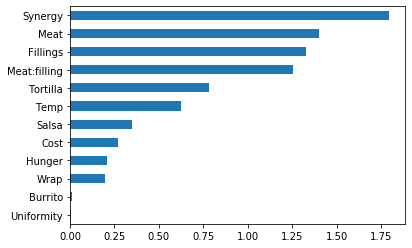

In [64]:
%matplotlib inline
coefficients = pd.Series(log_reg.coef_[0], cb_train_encoded.columns)
coefficients.sort_values().plot.barh();